# Será possível predizer o nível de satisfação de um passageiro de uma companhia aérea?

## Meta M1 - 14 de novembro de 2022

**Autores:**
**Miguel Fernandes** 2016014470, **Stephanie Batista** 2019114900

Este notebook tem como objetivo produzir uma abordagem sistemática e organizada à preparação do dataset <br>         -  https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction. <br><br>  Para isso, realiza-se uma descrição global dos dados e a visualização dos mesmos, bem como a sua preparação, para posteriormente serem serem submetidos a diferentes algoritmos de Supervised Learning e Unsupervised Learning.

### Importar Bibliotecas

In [1]:
# Manipulação de dados
import numpy as np
import pandas as pd
import scipy.stats as ss

#!pip install dython 
from dython import nominal

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Ignorar avisos
import warnings
warnings.filterwarnings("ignore")

## 1.Obtenção dos dados

In [2]:
data = pd.read_csv("data\Airline-Passenger-Satisfaction.csv")
data.shape

(25976, 25)

### Redução do tamanho dos dados

Para a obtenção do número de instâncias entre 1000 < N < 10000 , reduziu-se o número de instâncias do dataset importado mantendo a sua distribuição.

In [3]:
data , excess_data = train_test_split(data, test_size=0.615, random_state=25)

In [4]:
data.shape

(10000, 25)

## 2.Análise dos dados

In [5]:
data.head(10).sort_index()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
169,169,106220,Female,disloyal Customer,20,Business travel,Eco,471,4,5,...,3,4,3,4,5,4,3,0,0.0,neutral or dissatisfied
1570,1570,29104,Male,Loyal Customer,48,Personal Travel,Eco,956,3,4,...,5,5,4,4,4,4,5,0,5.0,neutral or dissatisfied
6950,6950,64915,Male,Loyal Customer,46,Business travel,Business,2288,2,4,...,2,2,2,2,2,2,1,76,67.0,neutral or dissatisfied
10572,10572,8900,Female,Loyal Customer,53,Personal Travel,Eco Plus,622,1,4,...,3,3,1,3,3,3,3,36,61.0,neutral or dissatisfied
16926,16926,117229,Male,Loyal Customer,33,Personal Travel,Eco,370,3,3,...,1,1,3,3,1,2,1,14,18.0,neutral or dissatisfied
17722,17722,26838,Female,disloyal Customer,22,Business travel,Eco,224,5,0,...,2,1,5,1,5,1,2,0,0.0,satisfied
19991,19991,92126,Male,Loyal Customer,23,Personal Travel,Eco,1589,2,2,...,4,2,5,4,4,4,4,0,0.0,neutral or dissatisfied
21071,21071,49720,Male,Loyal Customer,54,Business travel,Eco,109,1,0,...,3,1,5,3,4,3,3,0,0.0,neutral or dissatisfied
23772,23772,54552,Male,Loyal Customer,63,Personal Travel,Eco,925,2,5,...,1,5,5,4,5,4,1,0,17.0,neutral or dissatisfied
25175,25175,32363,Male,disloyal Customer,33,Business travel,Eco,102,3,0,...,4,4,2,5,1,3,4,0,0.0,neutral or dissatisfied


In [6]:
# Verificar se existem valores nulos

data.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             29
satisfaction                          0


In [7]:
# Verificar os diferentes tipos de atributos no dataset

data.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [8]:
# Verificar se existe duplicação de instâncias

data.duplicated().sum()

0

### Etapas iniciais de pré-processamento do dataset

In [9]:
# Remover a 1ª e 2ª coluna

data = data.drop(data.columns[[0,1]], axis=1) # Apaga as colunas 'Unnamed:0' e 'id' 

In [10]:
# Reordenação das colunas para facilitar a localização e indexação dos atributos

first_columns = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes','Age']
last_columns = [col for col in data.columns if col not in first_columns]

data = data[first_columns+last_columns]

In [11]:
data.head(5)

,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Age,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
21071,109,0,0.0,54,Male,Loyal Customer,Business travel,Eco,1,0,...,1,2,3,1,5,3,4,3,3,neutral or dissatisfied
1570,956,0,5.0,48,Male,Loyal Customer,Personal Travel,Eco,3,4,...,3,5,5,5,4,4,4,4,5,neutral or dissatisfied
10572,622,36,61.0,53,Female,Loyal Customer,Personal Travel,Eco Plus,1,4,...,5,4,3,3,1,3,3,3,3,neutral or dissatisfied
6950,2288,76,67.0,46,Male,Loyal Customer,Business travel,Business,2,4,...,3,3,2,2,2,2,2,2,1,neutral or dissatisfied
19991,1589,0,0.0,23,Male,Loyal Customer,Personal Travel,Eco,2,2,...,2,1,4,2,5,4,4,4,4,neutral or dissatisfied


In [12]:
# Conversão dos nomes dos atributos em minúsculas e substituição dos espaços por underscores

data.columns= data.columns.str.lower().str.replace(' ','_')

In [13]:
data.head(5)

,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes,age,gender,customer_type,type_of_travel,class,inflight_wifi_service,departure/arrival_time_convenient,...,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction
21071,109,0,0.0,54,Male,Loyal Customer,Business travel,Eco,1,0,...,1,2,3,1,5,3,4,3,3,neutral or dissatisfied
1570,956,0,5.0,48,Male,Loyal Customer,Personal Travel,Eco,3,4,...,3,5,5,5,4,4,4,4,5,neutral or dissatisfied
10572,622,36,61.0,53,Female,Loyal Customer,Personal Travel,Eco Plus,1,4,...,5,4,3,3,1,3,3,3,3,neutral or dissatisfied
6950,2288,76,67.0,46,Male,Loyal Customer,Business travel,Business,2,4,...,3,3,2,2,2,2,2,2,1,neutral or dissatisfied
19991,1589,0,0.0,23,Male,Loyal Customer,Personal Travel,Eco,2,2,...,2,1,4,2,5,4,4,4,4,neutral or dissatisfied


### Alguns detalhes estatísticos básicos sobre os dados

In [14]:
# Visualização das principais estatísticas dos dados

data.describe()

,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes,age,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness
count,10000.000000,10000.000000,9971.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,1196.636400,14.204300,14.761709,39.549700,2.734400,3.066000,2.775000,2.992000,3.20760,3.264000,3.440500,3.336200,3.379000,3.350600,3.63190,3.31770,3.652700,3.268200
std,992.407554,37.784157,38.045778,15.139843,1.339416,1.535148,1.409813,1.277536,1.34197,1.351106,1.330653,1.349945,1.278484,1.311889,1.17326,1.27747,1.177294,1.332234
min,67.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,1.00000,0.000000,0.000000
25%,419.000000,0.000000,0.000000,27.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.00000,3.000000,2.000000
50%,859.000000,0.000000,0.000000,40.000000,3.000000,3.000000,3.000000,3.000000,3.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,3.00000,4.000000,3.000000
75%,1747.000000,12.000000,13.000000,51.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,5.000000,4.000000,4.000000,4.000000,5.00000,4.00000,5.000000,4.000000
max,4963.000000,1128.000000,1115.000000,85.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.00000,5.000000,5.000000


Através desta tabela, podem ser retiradas algumas observações iniciais sobre o dataset:
- A média de idades dos passageiros é de 39 anos (varia entre os 7 e os 85 anos)
- Os atributos **'Departure Delay In Minutes'** e **'Arrival Delay In Minutes'** parecem seguir uma distribuição bastante semelhante entre elas
- Existe um grande desvio padrão nos dados relativos ao atributo **'Flight Distance'**

### Verificação do balanceamento do atributo alvo

neutral or dissatisfied    5643
satisfied                  4357
Name: satisfaction, dtype: int64


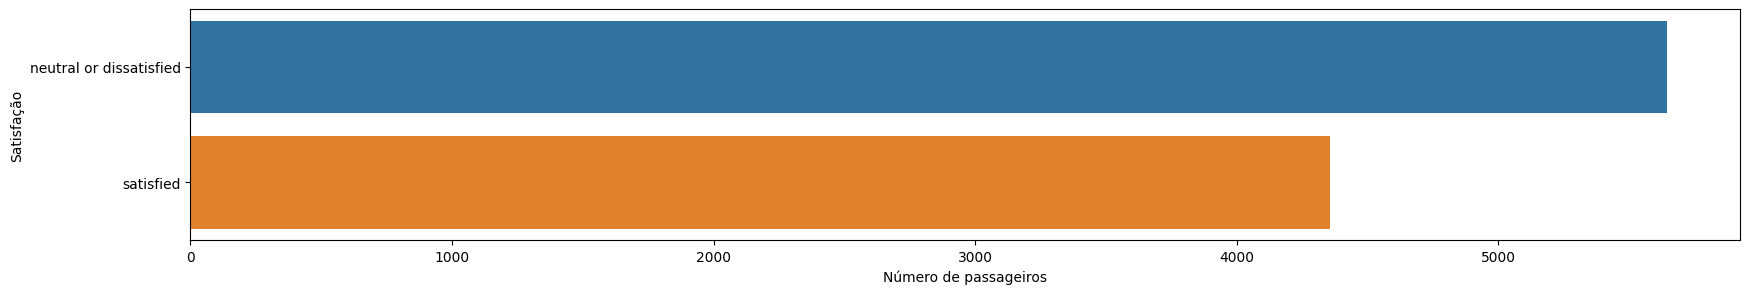

In [15]:
# Visualização do nível de satisfeitação dos passageiros

fig = plt.figure(figsize=(20,3))
ax = sns.countplot(y='satisfaction', data=data)
ax.set(ylabel='Satisfação', xlabel='Número de passageiros')
print(data.satisfaction.value_counts())

### Correlações

In [16]:
# Correlação entre os atributos numéricos e ordinais do dataset 

corr = data.corr()
corr

,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes,age,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness
flight_distance,1.000000,-0.005007,-0.009675,0.091757,0.013849,-0.003303,0.061144,0.008539,0.066412,0.218138,0.177420,0.153691,0.124351,0.142837,0.077433,0.075970,0.066009,0.118655
departure_delay_in_minutes,-0.005007,1.000000,0.965532,0.006355,0.003888,0.005481,0.003570,0.016354,-0.018921,-0.022604,-0.025193,-0.015737,-0.033173,0.018804,0.001954,-0.019912,-0.052334,-0.020541
arrival_delay_in_minutes,-0.009675,0.965532,1.000000,0.000727,0.000800,0.003382,0.003230,0.014201,-0.020876,-0.026067,-0.030300,-0.020462,-0.039696,0.012454,-0.004434,-0.024302,-0.063727,-0.022090
age,0.091757,0.006355,0.000727,1.000000,0.014228,0.031869,0.016511,0.004653,0.035524,0.200410,0.163412,0.077540,0.049905,0.037733,-0.044933,0.024560,-0.065025,0.055790
inflight_wifi_service,0.013849,0.003888,0.000800,0.014228,1.000000,0.349237,0.721526,0.350018,0.119257,0.471353,0.116825,0.195134,0.101073,0.161879,0.105282,0.038916,0.102654,0.118221
departure/arrival_time_convenient,-0.003303,0.005481,0.003382,0.031869,0.349237,1.000000,0.441648,0.456666,-0.017866,0.080367,0.003196,-0.027599,0.055739,0.014630,0.059743,0.085385,0.058447,-0.012519
ease_of_online_booking,0.061144,0.003570,0.003230,0.016511,0.721526,0.441648,1.000000,0.462933,0.019723,0.410791,0.022397,0.038490,0.022403,0.116358,0.027255,-0.010616,0.027571,0.006467
gate_location,0.008539,0.016354,0.014201,0.004653,0.350018,0.456666,0.462933,1.000000,-0.004748,0.009046,0.002720,0.007939,-0.035556,0.009252,0.000771,-0.057823,-0.009627,-0.012137
food_and_drink,0.066412,-0.018921,-0.020876,0.035524,0.119257,-0.017866,0.019723,-0.004748,1.000000,0.232213,0.589270,0.642598,0.061451,0.050340,0.039901,0.080008,0.039437,0.665639
online_boarding,0.218138,-0.022604,-0.026067,0.200410,0.471353,0.080367,0.410791,0.009046,0.232213,1.000000,0.421271,0.286469,0.142742,0.126129,0.076451,0.206410,0.068210,0.327921


Considerando o facto da função .corr() fazer apenas a análise da correlação entre atributos numéricos, procedeu-se à utilização da biblioteca dython, que faz uso da correlação Pearson para as variáveis contínuas, e da correlação Cramer para as variáveis nominais.

In [ ]:
# Correlação entre todos os atributos (nominais, numéricos e ordinais) do dataset 

c = nominal.associations(data,figsize=(18,18),mark_columns=True, cmap = "Blues");

### Visualização e descrição dos atributos

Fazendo uma análise aos coeficientes de correlação entre os vários atributos e o atributo alvo "satisfaction", constata-se que os atributos **class** e **online_boarding** são as que tem um maior nível de correlação com o atributo alvo.

In [ ]:
# Verificar os diferentes valores dos atributos nominais

[ print(f"{data[features].value_counts()} \n") for features in data if data[features].dtypes == "object" ]

In [ ]:
# Verificar a relação entre a lealdade dos passageiros e a satisfação dos mesmos

ax = sns.histplot( x="customer_type", hue="satisfaction", data=data, stat="count", multiple="stack", shrink=.2)
ax.set(xlabel='Tipo de passageiro', ylabel='Número de passageiros')

Surpreendentemente os níveis de **satisfied** e **neutral or dissatisfied** entre os clientes que se mostram leais são iguais.  <p>  De maneira mais esperada, por outro lado, os níveis de insatisfação nos clientes não leais são mais elevados do que os que se mostram satisfeitos. 

In [ ]:
# Isolar os atributos ordinais 

data_ordinal = data.iloc[:,8:-1]
data_ordinal.head(5)

In [ ]:
# Averiguar o número de plots a fazer

len(data_ordinal.columns)

In [ ]:
# Visualizar a distribuição de cada atributo relativamente aos atributos ordinais 

def draw_ordinal(df):
    fig, axes = plt.subplots(5, 3, figsize = (20, 20))
    for i, col in enumerate(df):
        column_values = df[col].value_counts().sort_index()
        labels = column_values.index
        sizes = column_values.values
        
        axes[i//3, i%3].pie(sizes, labels = labels, colors = sns.color_palette("pastel"), 
                            autopct = '%1.0f%%', startangle = 90)
        axes[i//3, i%3].axis('equal')
        axes[i//3, i%3].set_title(col, {'size':20})
        
        if i == len(df.columns)-1: # apaga o plot da 15ª posição
            i+=1
            fig.delaxes(axes[i//3][i%3])
       
    plt.show()

In [ ]:
draw_ordinal(data_ordinal)

Algumas observações:
- Os serviços com taxas mais elevadas de pior avaliação (1) foram: **Inflight wifi service**, a **Ease of Online booking** e a  **Gate location**.   <p>
 
- Os serviços de **Online boarding**, **Inflight entertainment**, **On-board service**, **Baggage handling**,**Inflight service** bem como os **Seat comfort** tiveram uma avaliação predominantemente positiva (>3).  <p>

- Os serviços de **Inflight wifi service**, **Ease of Online booking**, **Gate location**, **Food and drink**, os **Check-in service**, os **Cleanliness** bem como o **Departure/Arrival time convenient** tiveram uma distribuição semelhante de avaliações.

In [ ]:
# Isolar os atributos numéricos

data_numerical = data.iloc[:,0:4]

In [ ]:
# Histograma dos atributos numéricos

data_numerical.hist(bins=50, figsize=(15,10))

plt.show()

Através destes histogramas, observa-se visualmente alguns dos pressupostos iniciais feitos na interpretação estatística geral dos dados:  <p>
 
- A representação das idades parece seguir uma distribuição normal (passageiros com idades compreendidas entre os 7 e os 85 anos, com uma média de idades de 39 anos).  <p>

- A quantidade de minutos de atraso nas partidas e nas chegadas apresentam uma representação bastante semelhante.  <p>
    
- A distância percorrida pelo total de voos tem uma representação assimétrica, pois uma grande parte dos voos tem uma distância inferior a 1000 km, sendo que as distâncias totais percorridas por um voo ultrapassam os 4000 km.

In [ ]:
# Verificação da relação linear, ou não, entre os atributos

axes = sns.lmplot(x="departure_delay_in_minutes", y="arrival_delay_in_minutes", 
                  data=data_numerical,line_kws={'color': 'red'} ) 
axes.set(xlabel='Atraso nas partidas em min', ylabel='Atraso nas chegadas em min',
         title='Relação entre atrasos nas partidas e nas chegadas dos voos')

In [18]:
data['arrival_delay_in_minutes'].fillna(data['arrival_delay_in_minutes'].median(axis = 0), inplace = True)

In [19]:
# tornar binária a variável target

data['satisfaction']=data['satisfaction'].apply(lambda x: 1 if(x=='satisfied') else 0) 

In [ ]:
# saving the DataFrame as a CSV file
m2_df = data.to_csv('m2_df.csv', index = False)
print('\nCSV String:\n', m2_df)

In [20]:
data.head(5)

,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes,age,gender,customer_type,type_of_travel,class,inflight_wifi_service,departure/arrival_time_convenient,...,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction
21071,109,0,0.0,54,Male,Loyal Customer,Business travel,Eco,1,0,...,1,2,3,1,5,3,4,3,3,0
1570,956,0,5.0,48,Male,Loyal Customer,Personal Travel,Eco,3,4,...,3,5,5,5,4,4,4,4,5,0
10572,622,36,61.0,53,Female,Loyal Customer,Personal Travel,Eco Plus,1,4,...,5,4,3,3,1,3,3,3,3,0
6950,2288,76,67.0,46,Male,Loyal Customer,Business travel,Business,2,4,...,3,3,2,2,2,2,2,2,1,0
19991,1589,0,0.0,23,Male,Loyal Customer,Personal Travel,Eco,2,2,...,2,1,4,2,5,4,4,4,4,0


In [22]:
data.drop(["arrival_delay_in_minutes"], axis = 1, inplace = True)

In [ ]:
# saving the DataFrame as a CSV file
m2_df = data.to_csv('\data\Airline-Passenger-Satisfaction_m2.csv', index = False)
print('\nCSV String:\n', m2_df)